In [5]:
import ROOT
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
root_file = "new_pu10.root"
file = uproot.open(root_file)

event_amvf = [file["amvf;1"]["nRecoVtx"].array(), 
              file["amvf;1"]["nTrueVtx"].array(),
              file["amvf;1"]["nVtxReconstructable"].array(),
              file["amvf;1"]["diffx"].array(),
              file["amvf;1"]["diffy"].array(),
              file["amvf;1"]["diffz"].array(),
             ]

event_truth = [file["Truth_Vertex;7"]["event_id"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vx"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vy"].array(),
               file["Truth_Vertex;7"]["truth_vtx_vz"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_d0"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_z0"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_phi"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_theta"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_qp"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_time"].array(),
               file["Truth_Vertex;7"]["truth_vtx_fitted_trk_vtxID"].array(),
               file["Truth_Vertex;7"]["truth_particle_p"].array(),
               file["Truth_Vertex;7"]["truth_particle_px"].array(),
               file["Truth_Vertex;7"]["truth_particle_py"].array(),
               file["Truth_Vertex;7"]["truth_particle_pz"].array(),
               file["Truth_Vertex;7"]["truth_particle_pt"].array()]

event_reco = [file["Reco_Vertex;4"]["event_id"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vx"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vy"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vz"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_d0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_z0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_phi"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_theta"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_qp"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_time"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_vtxID"].array(), 
              file["Reco_Vertex;4"]["reco_vtx_fitquality_chiSquared"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_trackWeight"].array()]

event_amvf = np.expand_dims(event_amvf, axis = -1)
event_amvf = event_amvf.transpose((1,0,2))
event_amvf = np.squeeze(event_amvf, axis= (2,))

event_truth = np.expand_dims(event_truth, axis = -1)
event_truth = event_truth.transpose((1,0,2))
event_truth = np.squeeze(event_truth, axis= (2,))

event_reco = np.expand_dims(event_reco, axis = -1)
event_reco = event_reco.transpose((1,0,2))
event_reco = np.squeeze(event_reco, axis= (2,))

In [3]:
# save Truth Vertices and Truth Tracks, save the Reco Vertices and Reco Tracks
reco_d0, reco_z0, reco_vx, reco_vy, reco_vz, truth_d0, truth_z0, truth_vx, truth_vy, truth_vz = [], [], [], [], [], [], [], [], [], []
reco_phi, reco_theta, reco_qp, truth_phi, truth_theta, truth_qp = [], [], [], [], [], []
for i in range(len(event_reco)):
    num_track_per_vertex = np.bincount(event_reco[i][10])
    d0, z0, phi, theta, qp = [], [], [], [], []
    trk_count = 0
    for j in range(len(event_reco[i][1])):
        d0.append(event_reco[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
        z0.append(event_reco[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
        phi.append(event_reco[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
        theta.append(event_reco[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
        qp.append(event_reco[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
        trk_count += num_track_per_vertex[j]
    reco_d0.append(d0)
    reco_z0.append(z0)
    reco_phi.append(phi)
    reco_theta.append(theta)
    reco_qp.append(qp)

for i in range(len(event_truth)):
    num_track_per_vertex = np.bincount(event_truth[i][10])
    d0, z0, phi, theta, qp = [], [], [], [], []
    trk_count = 0
    for j in range(len(event_truth[i][1])):
        d0.append(event_truth[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
        z0.append(event_truth[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
        phi.append(event_truth[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
        theta.append(event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
        qp.append(event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
        trk_count += num_track_per_vertex[j]
    truth_d0.append(d0)
    truth_z0.append(z0)
    truth_phi.append(phi)
    truth_theta.append(theta)
    truth_qp.append(qp)

mean= 0.43397934904863933
standard deviation= 0.1584400555373396


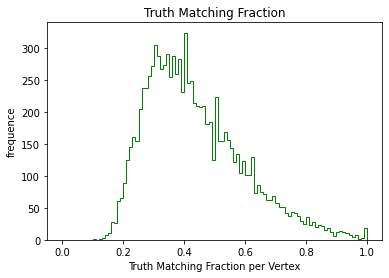

In [6]:
m = []
for i in range(len(event_reco)):
    fraction = []
    for j in range(len(event_truth[i][1])):

        truthd0, truthz0, truthphi, truththeta, truthqp = truth_d0[i][j], truth_z0[i][j], truth_phi[i][j], truth_theta[i][j], truth_qp[i][j]
        recod0, recoz0, recophi, recotheta, recoqp = event_reco[i][4], event_reco[i][5], event_reco[i][6], event_reco[i][7], event_reco[i][8]

        truthz0, truthd0, truthphi, truththeta, truthqp = zip(*sorted(zip(truthz0, truthd0, truthphi, truththeta, truthqp), reverse=True))
        recoz0, recod0, recophi, recotheta, recoqp = zip(*sorted(zip(recoz0, recod0, recophi, recotheta, recoqp), reverse=True))
        suc_reco = 0
        for u in range(len(truthz0)):
            for o in range(len(recoz0)):
                if truthz0[u] == recoz0[o] and truthd0[u] == recod0[o] and truthphi[u] == recophi[o] and truththeta[u] == recotheta[o] and truthqp[u] == recoqp[o]:
                    suc_reco += 1
                    break
                else:
                    continue
        fraction.append(suc_reco/len(recoz0))
    m.append(max(fraction))
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Using the given pt from the root file to save the truth information (problem)
hs_truth_d0, hs_truth_z0, hs_truth_phi, hs_truth_theta, hs_truth_qp = [], [], [], [], []
# Truth HS Vertices
for i in range(len(event_truth)):
    num_track_per_vertex = np.bincount(event_truth[i][10])
    trk_count = 0 
    d0, z0, phi, theta, qp = [], [], [], [], []
    trk = 0
    trk_init = 0
    trk_count = 0
    for j in range(len(event_truth[i][1])):
        pt = event_truth[i][15][trk_count:(trk_count+num_track_per_vertex[j])]
        pt = [i ** 2 for i in pt]
        trk = sum(pt)
        if trk > trk_init:
            d0 = (event_truth[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
            z0 = (event_truth[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
            phi = (event_truth[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
            theta = (event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
            qp = (event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
            trk_init = trk
        trk_count += num_track_per_vertex[j]
    hs_truth_d0.append(d0)
    hs_truth_z0.append(z0)
    hs_truth_phi.append(phi)
    hs_truth_theta.append(theta)
    hs_truth_qp.append(qp)

In [10]:
# Using the calculated pt to save the truth information
hs_truth_d0, hs_truth_z0, hs_truth_phi, hs_truth_theta, hs_truth_qp, ptl, hs_truth_vertex, ptl = [], [], [], [], [], [], [], []

for i in range(len(event_truth)):
    num_track_per_vertex = np.bincount(event_truth[i][10]) 
    trk_count, m0, momentum = 0, 0, []
    for j in range(len(event_truth[i][1])): 
        pt = 1 / (np.abs(event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])) * np.sin(event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
        momentum.append(pt)
        pt = [i ** 2 for i in pt]
        mpt = sum(pt)
        if mpt > m0:
            v = [event_truth[i][1][j], event_truth[i][2][j], event_truth[i][3][j]]
            d0 = (event_truth[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
            z0 = (event_truth[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
            phi = (event_truth[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
            theta = (event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
            qp = (event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
            m0 = mpt
        mpt = 0
        trk_count += num_track_per_vertex[j] 
    ptl.append(momentum)
    hs_truth_vertex.append(v)
    hs_truth_d0.append(d0)
    hs_truth_z0.append(z0)
    hs_truth_phi.append(phi)
    hs_truth_theta.append(theta)
    hs_truth_qp.append(qp)

<ipython-input-10-843d84c8f452>:8: RuntimeWarning: overflow encountered in true_divide
  pt = 1 / (np.abs(event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])) * np.sin(event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
<ipython-input-10-843d84c8f452>:10: RuntimeWarning: overflow encountered in double_scalars
  pt = [i ** 2 for i in pt]
<ipython-input-10-843d84c8f452>:8: RuntimeWarning: divide by zero encountered in true_divide
  pt = 1 / (np.abs(event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])) * np.sin(event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
<ipython-input-10-843d84c8f452>:8: RuntimeWarning: invalid value encountered in multiply
  pt = 1 / (np.abs(event_truth[i][8][trk_count:(trk_count+num_track_per_vertex[j])])) * np.sin(event_truth[i][7][trk_count:(trk_count+num_track_per_vertex[j])])


In [15]:
# problems occur in 51, 55, 60 ... 
matched = 0 
zero_pt = 0
unmatched = 0
for i in range(len(ptl)):
    if (len(ptl[i]) - len(event_truth[i][15])) <= 0.000001:
        matched += 1
    if len(event_truth[i][15]) == 0:
        zero_pt += 1
    if (len(ptl[i]) - len(event_truth[i][15])) > 0.000001:
        unmatched += 1

print("calculated = given:", matched)
print("given pt = 0:", zero_pt)
print("calculated != given", unmatched)

calculated = given: 9943
given pt = 0: 57
calculated != given 57


In [7]:
# Using the calculated pt to save the reco information
hs_reco_d0, hs_reco_z0, hs_reco_phi, hs_reco_theta, hs_reco_qp, hs_reco_vertex = [], [], [], [], [], []

for i in range(len(event_reco)):
    num_track_per_vertex = np.bincount(event_reco[i][10]) 
    trk_count, m0 = 0, 0
    for j in range(len(event_reco[i][1])): 
        pt = 1 / (np.abs(event_reco[i][8][trk_count:(trk_count+num_track_per_vertex[j])])) * np.sin(event_reco[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
        pt = [i ** 2 for i in pt]
        mpt = sum(pt)
        if mpt > m0:
            v = [event_reco[i][1][j], event_reco[i][2][j], event_reco[i][3][j]]
            d0 = (event_reco[i][4][trk_count:(trk_count+num_track_per_vertex[j])])
            z0 = (event_reco[i][5][trk_count:(trk_count+num_track_per_vertex[j])])
            phi = (event_reco[i][6][trk_count:(trk_count+num_track_per_vertex[j])])
            theta = (event_reco[i][7][trk_count:(trk_count+num_track_per_vertex[j])])
            qp = (event_reco[i][8][trk_count:(trk_count+num_track_per_vertex[j])])
            m0 = mpt
        mpt = 0
        trk_count += num_track_per_vertex[j] 
    hs_reco_vertex.append(v)
    hs_reco_d0.append(d0)
    hs_reco_z0.append(z0)
    hs_reco_phi.append(phi)
    hs_reco_theta.append(theta)
    hs_reco_qp.append(qp)

In [50]:
# Reco_HS_Efficiency = Number of Reconstructable truth HS vertex which is associated to Reconstructed Vertex / Number of Reconstructable truth HS vertex


mean= 0.6006667994805033
standard deviation= 0.14213793905302247


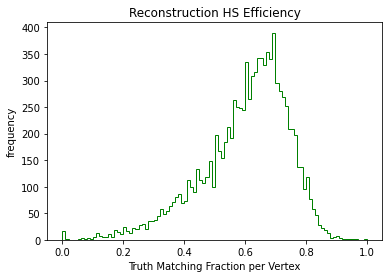

In [51]:
m = []
for i in range(len(event_reco)):
    fraction = []
    for j in range(len(event_reco[i][1])):
        suc_reco = 0
        for u in range(len(hs_truth_z0[i])):
            for k in range(len(reco_z0[i][j])):
                if reco_z0[i][j][k] == hs_truth_z0[i][u] and reco_d0[i][j][k] == hs_truth_d0[i][u] and reco_phi[i][j][k] == hs_truth_phi[i][u] and reco_theta[i][j][k] == hs_truth_theta[i][u] and reco_qp[i][j][k] == hs_truth_qp[i][u]:
                    suc_reco += 1
                    break
                else:
                    continue
        fraction.append(suc_reco/len(hs_truth_z0[i]))
    m.append(max(fraction))
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Reconstruction HS Efficiency')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [55]:
# calculation the reconstructed efficiency using the benchmark for maximum fraction to be 0.6 to become associated
m = [i for i in m if i >= 0.6]
print("Reconstruction HS Efficiency:", len(m)/len(hs_truth_vertex))

Reconstruction HS Efficiency: 0.5811


In [16]:
def dist_cal(list1, list2):
    dist = np.sqrt((list1[0]-list2[0])**2 + (list1[1]-list2[1])**2 + (list1[2]-list2[2])**2)
    return dist

def print_out(list1, list2):
    print("diff_x:", list1[0]-list2[0], "diff_y", list1[1]-list2[1], "diff_z", list1[2]-list2[2])

# create a list of vertices per event
vertex_reco, vertex_truth = [], []
for i in range(len(event_truth)):
    temp_reco, temp_truth = [], []
    for j in range(len(event_reco[i][1])):
        temp_reco.append([event_reco[i][1][j], event_reco[i][2][j], event_reco[i][3][j]])
    for k in range(len(event_truth[i][1])):
        temp_truth.append([event_truth[i][1][k], event_truth[i][2][k], event_truth[i][3][k]])
    vertex_reco.append(temp_reco)
    vertex_truth.append(temp_truth)


<ipython-input-27-055c8e18f74c>:33: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff.Fill(Reco, localPUDensity);
Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


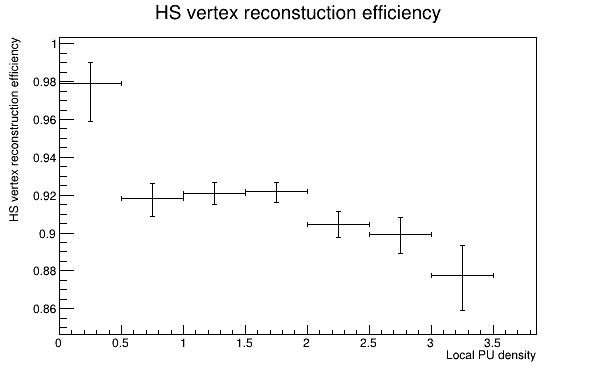

In [27]:
#To successfully reconstruct a HS, 2 tests are done: 
# 1. |reco_HS - truth_HS| < 0.1 mm
# 2. reco_HS is the closest vertex to the truth_HS among all the vertices reconstructed in that event

# local pile-up density near a vertex, defined as the number of generated vertices per unit length within a symmetrical ±2 mm longitudinal window

c = ROOT.TCanvas("fillhist", "title", 600, 400)
#c.SetFillStyle(1001)
TEff = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency;Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)

long_window = 2
for i in range(len(vertex_truth)):
    #localPUDensity
    nTracksInWindow = 0
    
    for j in range(len(vertex_truth[i])-1):
        for k in range(j, len(vertex_truth[i])):
            dist2 = np.abs(vertex_truth[i][j][2] - vertex_truth[i][k][2])
            if dist2 < long_window:
                nTracksInWindow += 1
    
    localPUDensity = nTracksInWindow/(2 * long_window);
    
    
    #Reco Test
    hs_dist = dist_cal(hs_truth_vertex[i], hs_reco_vertex[i])
    
    pu_dist = []
    for j in range(len(vertex_reco[i])):
        pu_dist.append(dist_cal(hs_truth_vertex[i], vertex_reco[i][j]))
    
    Reco = hs_dist <= 0.1 and min(pu_dist)==hs_dist
    TEff.Fill(Reco, localPUDensity);

TEff.Draw()
c.Draw()

<ipython-input-19-d722d86f6766>:29: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff.Fill(Reco, localPUDensity);
Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


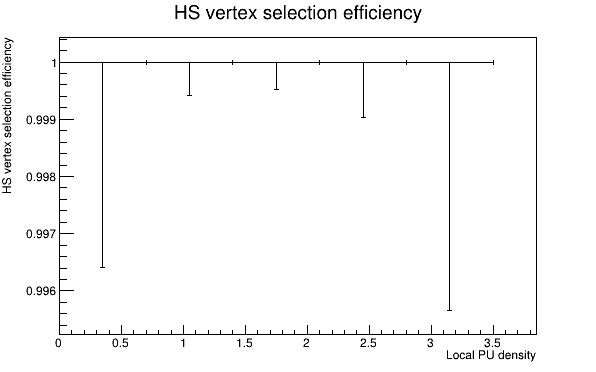

In [19]:
# The selection efficiency is the fraction of events where the reconstructed vertex with highest ÍpT2 is the one containing the largest total weight from true HS tracks.
c = ROOT.TCanvas("fillhist", "title", 600, 400)
#c.SetFillStyle(1001)
TEff = ROOT.TEfficiency("eff", "HS vertex selection efficiency;Local PU density;HS vertex selection efficiency", 5, 0, 3.5)

long_window = 2
for i in range(len(vertex_truth)):
    #localPUDensity
    nTracksInWindow = 0
    
    for j in range(len(vertex_truth[i])-1):
        for k in range(j, len(vertex_truth[i])):
            dist2 = np.abs(vertex_truth[i][j][2] - vertex_truth[i][k][2])
            if dist2 < long_window:
                nTracksInWindow += 1
    
    localPUDensity = nTracksInWindow/(2 * long_window);
    
    
    #Sel Test
    vx = []
    for j in range(len(event_reco[i][1])):
        vx.append(event_reco[i][1][j])
    
    trk_weight_reco = event_reco[i][12]
    trk_weight_reco, vx = zip(*sorted(zip(trk_weight_reco, vx), reverse=True))
    
    Sel = vx[0]==hs_truth_vertex[i]
    TEff.Fill(Reco, localPUDensity);

TEff.Draw()
c.Draw()